## **Perform EDA on Titanic Data Set from Kaggle and Applying Logistic Regression**
## **Here We will trying to predict a classification - Survived or not. Let's implementing Logistic Regression in Python for Classification**

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load the Data Set

In [2]:
data= pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
data["Survived"].unique()

array([0, 1], dtype=int64)

In [6]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

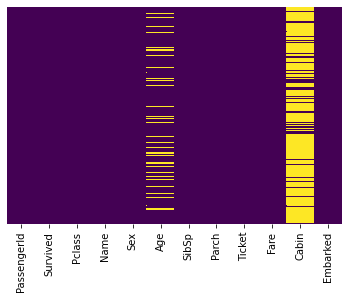

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1296x432 with 0 Axes>

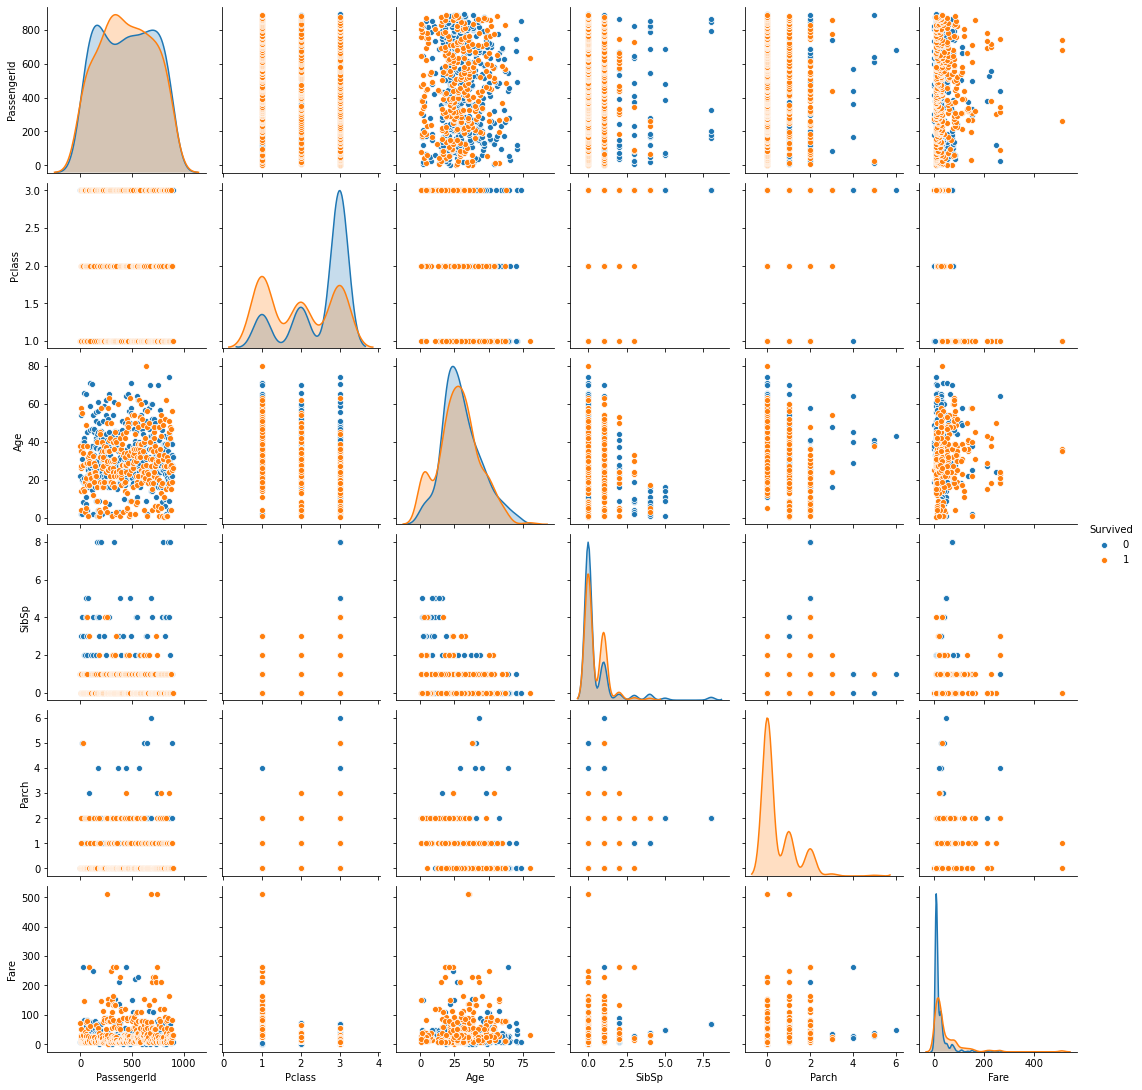

In [10]:
plt.figure(figsize=(18,6))
sns.pairplot(data=data,hue="Survived")
plt.show()

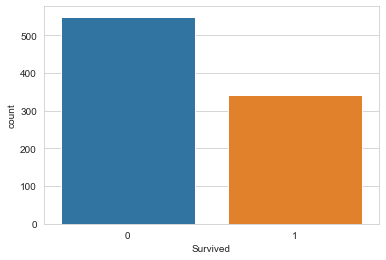

In [11]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=data)
plt.show()

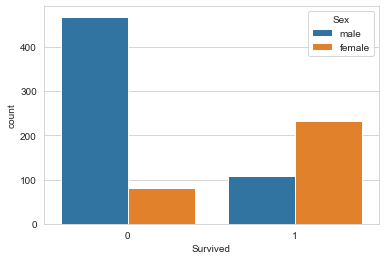

In [12]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=data,hue="Sex")
plt.show()

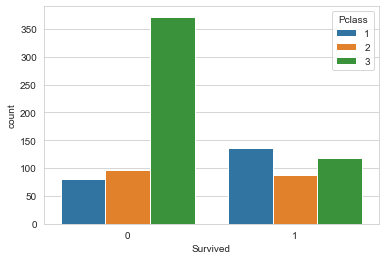

In [13]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=data,hue="Pclass")
plt.show()

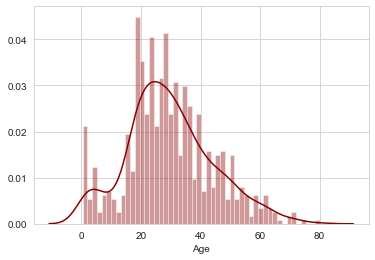

In [14]:
sns.distplot(data["Age"].dropna(),color="darkred",bins=50)
plt.show()

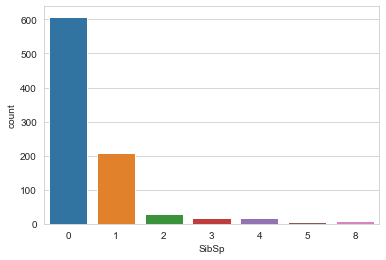

In [15]:
sns.countplot(x="SibSp",data=data)
plt.show()

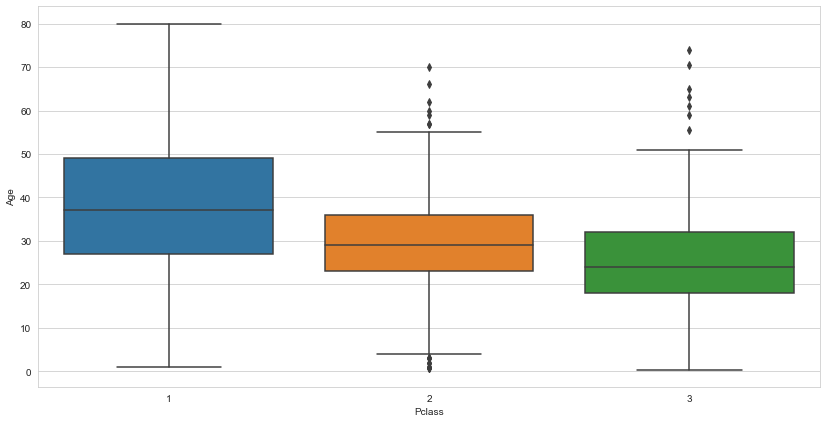

In [16]:
plt.figure(figsize=(14,7))
sns.boxplot(x="Pclass",y="Age",data=data)
plt.show()

Based on this Box Plot, We will use this average values to impute based on Pclass for Age

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

Now Apply that function

In [18]:
data["Age"]=data[["Age","Pclass"]].apply(impute_age,axis=1)

In [19]:
data.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)

In [20]:
data.dropna(inplace=True)

Now lets check the Heat Map again

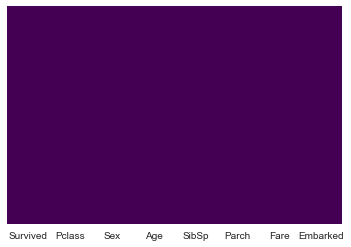

In [21]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

## Now Perform EDA help of pandas_visual_analysis

In [22]:
from pandas_visual_analysis import VisualAnalysis

In [23]:
VisualAnalysis(data)

In [24]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
new_data=pd.get_dummies(data,drop_first=True)

In [27]:
new_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
new_data.shape

(889, 9)

Then check After Cleaning our New Data Set have any null values or not 

In [29]:
new_data.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Great! our Data is Ready for Our Model

## Building a Logistic Regression Model

In [30]:
x=new_data.drop("Survived",axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [31]:
y=new_data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [32]:
x.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [33]:
y.isnull().sum()

0

In [34]:
x.dtypes

Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male        uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [35]:
type(x)

pandas.core.frame.DataFrame

In [36]:
x.shape

(889, 8)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


## Training & Prediction

In [40]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
prediction= model.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
Accuracy= confusion_matrix(y_test,prediction)

In [44]:
Accuracy

array([[141,  24],
       [ 31,  71]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       165
           1       0.75      0.70      0.72       102

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [46]:
model.score(x_test,y_test)

0.7940074906367042